<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Pesquisa-PID/Implementa%C3%A7%C3%A3o-Algoritmos/Apresenta%C3%A7%C3%A3o_PID_Implementa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Aprendizado Não-Supervisionado

"*O aprendizado não supervisionado é um ramo do Machine Learning que aprende com dados de teste que não foram rotulados, classificados ou categorizados previamente. Em vez de responder à programação de um operador, o aprendizado não supervisionado identifica semelhanças nos dados e reage com base na presença ou ausência de tais semelhanças em cada novo dado*

**Essa abordagem de Aprendizado de Máquina é útil quando não possuímos rótulos (Labels) para os nossos dados. Isto é importante pelo fato de que em muitos contexos possuir esses dados pode ser difícil e/ou custoso.**


Nesse caso de estudo, pelo fato da base de dados ser atual, real e ter sido coletada em um contexto de uma rede social, não se faz possível possuir rótulos para a classificação de textos. Dessa forma, objetiva-se agrupar os dados de forma não supervisionada.

# Clustering

**Clustering é uma técnica de Aprendizado de Máquina que envolve o agrupamento de pontos de dados.**

Utiliza-se algoritmos de clustering para agrupar pontos de dados em grupos específicos, cujos, na teoria devem possuir propriedades/características semelhantes.

**K-Means**

K-Means é um método de Clustering que tem como objetivo o particionamento de n observações dentre k grupos, onde cada observação pertence ao grupo mais próximo da média.


A execução do K-Means segue um conjunto de passos, descritos abaixo:

1. Selecionar um número de classes/grupos para utilizar e inicializarmos aleatoriamente seus respectivos pontos centrais (Centróides). Esses grupos podem ser definidos de acordo com a regra do negócio ou a perspectiva do problema.
2. Cada de ponto de dados é classificado, baseando-se na distância entre esse ponto e o centro do grupo.
3. Com base nos pontos classificados, recalcula-se o centróide, a partir da média das distâncias de todos os vetores do grupo.  

Esses dois últimos passos são repetidos, até que o limite de iterações pré-determinado seja atingido, ou quando os centróides não sofrerem alterações significantes de uma iteração para outra.



**Vantagens:**

- É rápido, visto que o que é feito é somente calcular as distâncias entre os pontos e os centróides do grupo. Possui então complexidade linear O(n). 

- É simples de aplicar e se mostra eficiente.

**Desvantagens:**

- Dificuldade para determinar a quantidade de clusters (Dependendo do Objetivo).

- Pode ser inconsistente, a depende do conjunto de dados.

# Importando Bibliotecas, Módulos e Dados

In [93]:
pip install Unidecode

In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import spacy  
import nltk
nltk.download('stopwords')
import re  
from collections import defaultdict 
from unidecode import unidecode
import logging 
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
#Criando Data Frame a partir dos dados.
data = pd.read_csv('dados-pesquisa.csv')
data = data[['created_at', 'text', 'lang']]

# Visualizando e Explorando os dados

In [96]:
#Visualizando as 5 primeiras linhas.
data.head()

,created_at,text,lang
0,Mon May 18 17:53:01 +0000 2020,"Tudo mudou na nossa forma de trabalhar, mas na...",pt
1,Mon May 18 17:52:17 +0000 2020,McDonald’s já reabriu lojas ao público https:/...,pt
2,Mon May 18 17:50:40 +0000 2020,"Sindicato, está atento em tudo o que envolve s...",pt
3,Mon May 18 17:49:17 +0000 2020,Nossos problemas da saúde definitivamente acab...,pt
4,Mon May 18 17:49:06 +0000 2020,Fábricas de todo o mundo se viram obrigadas a ...,pt


In [97]:
#Visualizando as 5 últimas linhas.
data.tail()

,created_at,text,lang
109959,Mon Jul 20 15:04:14 +0000 2020,porto alegre perigando a entrar em lockdown e ...,pt
109960,Mon Jul 20 15:03:35 +0000 2020,"Nunca que a Mídia vai falar isso!\nAMB, CFM e ...",pt
109961,Mon Jul 20 15:03:33 +0000 2020,@joaopiresrj Eu não sou cientista mas esse LOC...,pt
109962,Mon Jul 20 15:01:54 +0000 2020,Q&amp;A - Recessão ou Lockdown. O que é pior? ...,pt
109963,Mon Jul 20 15:01:38 +0000 2020,O prefeito de Los Angeles está preste a decret...,pt


In [98]:
#Verificando a estrutura inicial dos dados.
data.shape

(109964, 3)

**Podemos observar aproximadamente 110 mil linhas e 6 colunas.**

# Pré-Processando os dados

In [99]:
#Removendo dados duplicados na coluna de Texto e substituindo dentro do próprio Data Frame.
data.drop_duplicates(['text'], inplace=True)

In [100]:
#Verificando novamente a estrutura dos dados para observar a quantidade de dados únicos.
data.shape

(103364, 3)

6600 linhas foram removidas.

**Iremos trabalhar com os Dados de Texto, por isso, selecionaremos apenas a coluna associada ao conteúdo dos tweets.**

In [101]:
#Utilizando notação comum em estudos de Aprendizado de Máquina.
X = data['text']

In [102]:
#Visualizando as 15 primeiras linhas. 
X[:15]

0     Tudo mudou na nossa forma de trabalhar, mas na...
1     McDonald’s já reabriu lojas ao público https:/...
2     Sindicato, está atento em tudo o que envolve s...
3     Nossos problemas da saúde definitivamente acab...
4     Fábricas de todo o mundo se viram obrigadas a ...
5     @g1 @RedeGlobo @jornalhoje o governo de @jairb...
6     Lei N° 6666, nos #EUA, que pretende traçar e i...
7     https://t.co/mcftUwJr5F o governo precisa ser ...
8     Blockchain: a tecnologia que popularizou o #bi...
9     VOCÊS CONHECEM ALGUM PAÍS ALÉM DO BRASIL QUE T...
10    Itajuípe recebe o Centro Municipal de Isolamen...
11    📣 NOTÍCIA / NEWS / NOUVELLES \n\n🇵🇹 Manual de ...
12    Enquanto o governo Bolsonaro permanecer Irresp...
13    Faça a diferença! Seja um doador sem fronteira...
14    Manaus, maio de 2020. Reportagem sobre o colap...
Name: text, dtype: object

**Devido ao fato de os dados serem proveninentes de uma rede social, se faz necessária uma etapa de pré-processamento nos mesmos.**

In [103]:
def Preprocessing_data(instance):
      instance = re.sub(r"http\S+", "", instance).lower().replace('.', '').replace(';','').replace('-','').replace(':', '').replace(')', '').replace('(', '')
      stopwords = set(nltk.corpus.stopwords.words('portuguese'))
      words = [i for i in instance.split() if not i in stopwords]
      return (" ".join(words))

**Função que remove links, urls, sinais de pontuação, padroniza os caracteres como minúsculos e remove as stopwords através de um dos módulos da biblioteca NLTK.**

In [104]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [105]:
#remove_emoji('📣 notícia / news / nouvelles 🇵🇹 manual boas práticas – algarve clean &amp safe 🇬🇧 good practice guide')

In [106]:
#Aplicando a função na nossa base de dados.
X = [Preprocessing_data(i) for i in X]

In [107]:
X = [remove_emoji(i) for i in X]

In [108]:
#Visualizando novamente as 15 primeiras linhas, agora após o pré-processamento.
X[:15]

['tudo mudou forma trabalhar, nada mudou objetivo informar #jornalismo #imprensa…',
 'mcdonald’s reabriu lojas público #comida #covid19 #mcdonalds',
 'sindicato, atento tudo envolve saúde condições trabalho nessa pandemia #covid @spbancarios',
 'problemas saúde definitivamente acabaram #saude #forabolsonaro #covid',
 'fábricas todo mundo viram obrigadas dispensarem funcionários decorrência #covid19 antes m…',
 '@g1 @redeglobo @jornalhoje governo @jairbolsonaro vai socorrer ninguém vai enrolar! pois minto quer r…',
 'lei n° 6666, #eua, pretende traçar investigar percurso pessoas tivestes contatos, usand…',
 'governo precisa ser responsabilizado #covid #covid19',
 'blockchain tecnologia popularizou #bitcoin sendo testada combate #covid19 sistema capaz de…',
 'conhecem algum país além brasil torcida organizada coronavirus???? #covid #covid19',
 'itajuípe recebe centro municipal isolamento covid19 #covid19 #isolamentosocial #covid @rctitajuipe',
 ' notícia / news / nouvelles  manual boas p

In [109]:
import random
random.shuffle(X)

In [110]:
X

['bom dia, gente tô ativa aqui durante votação porque, além mãe cardíaca ter contraído o…',
 '@madalen24653040 @mariama12307242 @aurevanini vc desinforma pessoas ,como igual todas pess…',
 'quarentena fica casa lockdown vassoura bozo impeachment presidente razão governadores governo china chineses vír…',
 'covid 19 recado mineiros via @youtube',
 'prefeitura curitiba decrete lockdown antes sistema saúde colapso assine petição!…',
 'superlotado, hospital viamão pede receber novos pacientes',
 '#brasil | rio atendimento crianças jovens depressão póscoronavírus',
 'alerta nacionalmanaus tudo funcionando, caos coronavírus',
 'ansiosa coronavírus',
 'lockdown eh burro puta q pariu nao jeito país',
 'teófilo otoni recebeu 21 milhões reais enfrentamento coronavírus vamos ser sinceros, alguém sabe o…',
 'novo saque objetivo enfrentar estado calamidade pública razão pandemia covid19',
 'crise instaurada acusação genocídio somente confirma omissão exército instrumentalização pol…',
 'nenhuma nov

In [111]:
#Criando DataFrame com os dados pré-processados.
data_text = pd.DataFrame(data=X, columns=['text'])

In [112]:
data_text

,text
0,"bom dia, gente tô ativa aqui durante votação p..."
1,@madalen24653040 @mariama12307242 @aurevanini ...
2,quarentena fica casa lockdown vassoura bozo im...
3,covid 19 recado mineiros via @youtube
4,prefeitura curitiba decrete lockdown antes sis...
...,...
103359,novo #coronavírus instalou realidade criando s...
103360,falando amigos sobre ir pra paulo próximas fér...
103361,pizzaiolo aberto prato principal coronavirus
103362,michael beasley testou positivo pro coronavíru...


In [113]:
data_text.text = data_text.text.apply(unidecode)

In [114]:
#file_export = file_model.copy()
#file_export['old_title'] = file_export.title
#file_export.old_title = file_export.old_title.str.join(' ')
#file_export.title = file_export.title.apply(lambda x: ' '.join(bigram[x]))

In [115]:
#file_export[['title', 'rate']].to_csv('cleaned_dataset.csv', index=False)

In [116]:
#v = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [117]:
#teste = v.fit_transform(data_text['text'].apply(lambda x: np.str_(x)))
#teste

In [118]:
#data_text.to_csv('dados_preprocessados.csv', index=False)

In [119]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
#len(data_text['text']) * 0.7

In [121]:
#train_data = pd.DataFrame()
#test_data = pd.DataFrame()
#train_data['text'] = data_text['text'][:72354]
#test_data['text'] = data_text['text'][72354:]

In [122]:
#train_data

In [123]:
#test_data

# Transformando os Dados

In [124]:
#Importando módulos do Gensim, biblioteca que auxilia na implementação do Modelo Word2VEC.
from gensim.models.phrases import Phrases, Phraser

In [125]:
#Quebrando as frases por palavra.
sent = [row.split() for row in data_text['text']]

In [126]:
#Visualizando a representação criada acima.
sent

[['bom',
  'dia,',
  'gente',
  'to',
  'ativa',
  'aqui',
  'durante',
  'votacao',
  'porque,',
  'alem',
  'mae',
  'cardiaca',
  'ter',
  'contraido',
  'o...'],
 ['@madalen24653040',
  '@mariama12307242',
  '@aurevanini',
  'vc',
  'desinforma',
  'pessoas',
  ',como',
  'igual',
  'todas',
  'pess...'],
 ['quarentena',
  'fica',
  'casa',
  'lockdown',
  'vassoura',
  'bozo',
  'impeachment',
  'presidente',
  'razao',
  'governadores',
  'governo',
  'china',
  'chineses',
  'vir...'],
 ['covid', '19', 'recado', 'mineiros', 'via', '@youtube'],
 ['prefeitura',
  'curitiba',
  'decrete',
  'lockdown',
  'antes',
  'sistema',
  'saude',
  'colapso',
  'assine',
  'peticao!...'],
 ['superlotado,',
  'hospital',
  'viamao',
  'pede',
  'receber',
  'novos',
  'pacientes'],
 ['#brasil',
  '|',
  'rio',
  'atendimento',
  'criancas',
  'jovens',
  'depressao',
  'poscoronavirus'],
 ['alerta', 'nacionalmanaus', 'tudo', 'funcionando,', 'caos', 'coronavirus'],
 ['ansiosa', 'coronavirus'],

In [127]:
phrases = Phrases(sent, min_count=1, progress_per=10000)

INFO - 14:21:18: collecting all words and their counts
INFO - 14:21:18: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 14:21:18: PROGRESS: at sentence #10000, processed 100585 words and 96935 word types
INFO - 14:21:18: PROGRESS: at sentence #20000, processed 201345 words and 172548 word types
INFO - 14:21:18: PROGRESS: at sentence #30000, processed 302248 words and 240865 word types
INFO - 14:21:19: PROGRESS: at sentence #40000, processed 402517 words and 304427 word types
INFO - 14:21:19: PROGRESS: at sentence #50000, processed 503684 words and 365237 word types
INFO - 14:21:19: PROGRESS: at sentence #60000, processed 604279 words and 423451 word types
INFO - 14:21:19: PROGRESS: at sentence #70000, processed 705186 words and 478808 word types
INFO - 14:21:19: PROGRESS: at sentence #80000, processed 805666 words and 532247 word types
INFO - 14:21:20: PROGRESS: at sentence #90000, processed 906006 words and 583945 word types
INFO - 14:21:20: PROGRESS: at sentence #

In [128]:
#Construindo modelo baseado em Bigram, para a detecção de palavras (únicas) que são formadas por outras duas.
bigram = Phraser(phrases)

INFO - 14:21:20: source_vocab length 652521
INFO - 14:21:23: Phraser added 50000 phrasegrams
INFO - 14:21:26: Phraser built with 59027 phrasegrams


In [129]:
sentences = sent

In [130]:
len(sentences)

103364

In [131]:
#Percorrendo os dados e fazendo uma contagem para verificar as palavras mais frequentes da base.
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

108973

In [132]:
#Exibindo as 10 palavras mais frequentes da base de dados.
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['coronavirus',
 'covid19',
 'lockdown',
 'casos',
 'brasil',
 '#coronavirus',
 'pra',
 'novo',
 'mortes',
 'contra']

# Criando o Modelo Word2VEC.

In [133]:
#Importando biblioteca e módulo do Gensim, para a implementação do Word2VEC.
import multiprocessing

from gensim.models import Word2Vec

In [134]:
#Função que conta o número de cores da máquina.
cores = multiprocessing.cpu_count()

In [135]:
#Instanciando modelo Word2VEC a partir dos mesmos parâmetros estabelecidos pelo artigo.
w2v_model = Word2Vec(min_count=3,
                     window=4,
                     size=300,
                     sample=1e-5, 
                     alpha=0.06, 
                     min_alpha=0.0001, 
                     negative=10,
                     workers=multiprocessing.cpu_count()-1)

In [136]:
#Construindo vocabulário a partir das sentenças.
w2v_model.build_vocab(sentences, progress_per=10000)

INFO - 14:21:26: collecting all words and their counts
INFO - 14:21:26: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 14:21:26: PROGRESS: at sentence #10000, processed 100585 words, keeping 25007 word types
INFO - 14:21:26: PROGRESS: at sentence #20000, processed 201345 words, keeping 39231 word types
INFO - 14:21:26: PROGRESS: at sentence #30000, processed 302248 words, keeping 50746 word types
INFO - 14:21:26: PROGRESS: at sentence #40000, processed 402517 words, keeping 60853 word types
INFO - 14:21:26: PROGRESS: at sentence #50000, processed 503684 words, keeping 70021 word types
INFO - 14:21:26: PROGRESS: at sentence #60000, processed 604279 words, keeping 78474 word types
INFO - 14:21:26: PROGRESS: at sentence #70000, processed 705186 words, keeping 86179 word types
INFO - 14:21:26: PROGRESS: at sentence #80000, processed 805666 words, keeping 93408 word types
INFO - 14:21:26: PROGRESS: at sentence #90000, processed 906006 words, keeping 100245 word typ

# Treinando o Modelo Word2VEC

In [137]:
#Treiando modelo Word2VEC.
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

INFO - 14:21:33: training model with 1 workers on 29157 vocabulary and 300 features, using sg=0 hs=0 sample=1e-05 negative=10 window=4
INFO - 14:21:34: EPOCH 1 - PROGRESS: at 38.43% examples, 139906 words/s, in_qsize 2, out_qsize 0
INFO - 14:21:35: EPOCH 1 - PROGRESS: at 75.87% examples, 137922 words/s, in_qsize 2, out_qsize 0
INFO - 14:21:35: worker thread finished; awaiting finish of 0 more threads
INFO - 14:21:35: EPOCH - 1 : training on 1040643 raw words (371725 effective words) took 2.7s, 137874 effective words/s
INFO - 14:21:36: EPOCH 2 - PROGRESS: at 38.43% examples, 141912 words/s, in_qsize 1, out_qsize 0
INFO - 14:21:37: EPOCH 2 - PROGRESS: at 75.87% examples, 139184 words/s, in_qsize 2, out_qsize 0
INFO - 14:21:38: worker thread finished; awaiting finish of 0 more threads
INFO - 14:21:38: EPOCH - 2 : training on 1040643 raw words (371317 effective words) took 2.7s, 138526 effective words/s
INFO - 14:21:39: EPOCH 3 - PROGRESS: at 38.43% examples, 140626 words/s, in_qsize 1, ou

(3717117, 10406430)

In [138]:
#Tornando o modelo mais eficiente em questões de uso de memória.
w2v_model.init_sims(replace=True)

INFO - 14:22:00: precomputing L2-norms of word weight vectors


In [139]:
file_export = data_text.copy()
file_export['text'] = data_text.text
file_export.text = file_export.text.str.join(' ')
file_export.text = file_export.text.apply(lambda x: ' '.join(bigram[x]))

In [140]:
file_export['text'].to_csv('cleaned_dataset.csv', index=False)

# Visualizando Resultados do Modelo Word2VEC

**A partir do Word2VEC podemos verificar a similaridade de outras palavras para determinados termos.**

In [141]:
w2v_model.wv.most_similar(["vacina"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('oxford', 0.9723142385482788),
 ('contra', 0.9673560857772827),
 ('resposta', 0.9656339883804321),
 ('segura', 0.960969090461731),
 ('imune,', 0.9607794284820557),
 ('induz', 0.9586244225502014),
 ('produz', 0.9572130441665649),
 ('preliminares', 0.9495623111724854),
 ('lancet', 0.9407810568809509),
 ('eficaz,', 0.9406037330627441)]

**Podemos determinar filtros para uma verificação de similaridade.**

In [142]:
w2v_model.wv.most_similar(["recuperados"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('registrados', 0.9988051652908325),
 ('casos,', 0.9974203109741211),
 ('1284', 0.9968394041061401),
 ('81487', 0.9967070817947388),
 ('631', 0.9966814517974854),
 ('confirma', 0.996620774269104),
 ('bate', 0.9965873956680298),
 ('infectados', 0.9963682889938354),
 ('2227514', 0.9961702823638916),
 ('41008', 0.9961540102958679)]

In [143]:
w2v_model.wv.most_similar(["mortes"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('24', 0.9954820871353149),
 ('novos', 0.9943863153457642),
 ('confirmados', 0.9931433200836182),
 ('recorde', 0.9929419755935669),
 ('registra', 0.9924924373626709),
 ('total', 0.9918953776359558),
 ('ultimas', 0.9909769296646118),
 ('horas', 0.9897094964981079),
 ('casos', 0.9890599846839905),
 ('obitos', 0.9880453944206238)]

**Podemos compararar a taxa de similaridade para termos específicos.**

In [144]:
w2v_model.wv.similarity("coronavirus", "mortes")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



0.7310766

In [145]:
w2v_model.wv.similarity("covid19", "mortes")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



0.9098529

In [146]:
w2v_model.wv.similarity("covid19", "china")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



0.621215

In [147]:
w2v_model.wv.similarity("coronavirus", "casos")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



0.69458

In [148]:
w2v_model.wv.similarity("pandemia", "oms")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



0.65747756

**Dado uma lista, qual palavra não se encaixa no contexto ?**

In [149]:
w2v_model.wv.doesnt_match(["mortes", "alegria", "casos"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



'alegria'

Positive = Semelhantes
Negative = Opostas

# Aplicando Modelo Não Supervisionado

In [150]:
#Importando algoritmo KMeans da biblioteca Sklearn.
from sklearn.cluster import KMeans

In [151]:
#Carregando modelo Word2VEC.
word_vectors = w2v_model.wv
#Criando instância do algoritmo K-Means e passando como entrada os vetores originados pelo Word2VEC.
#n_clusters=2, max_iter=1000, random_state=True, n_init=50
model = KMeans(n_clusters=2, init='k-means++', max_iter=2000, random_state=True, n_init=50).fit(X=word_vectors.vectors)

In [152]:
negative_cluster_center = model.cluster_centers_[1]
positive_cluster_center = model.cluster_centers_[0]

In [153]:
#Verificando os vetores que foram entradas para o algoritmo, criados pelo modelo Word2VEC.
word_vectors.vectors

array([[ 0.02696095,  0.06521392,  0.06320383, ..., -0.00250553,
         0.00714118, -0.00380866],
       [ 0.07966038,  0.03340606,  0.11554992, ..., -0.01908712,
        -0.01464909, -0.01104316],
       [-0.00537265,  0.0716317 , -0.05253655, ..., -0.03232085,
         0.0621714 ,  0.03497974],
       ...,
       [ 0.05446112,  0.06354771,  0.06916758, ..., -0.01053809,
         0.02805028,  0.00942087],
       [ 0.0524045 ,  0.06419395,  0.06755189, ..., -0.00713364,
         0.03030666,  0.01079334],
       [ 0.05518993,  0.06366949,  0.07094071, ..., -0.00727862,
         0.02911434,  0.00896895]], dtype=float32)

In [154]:
model.cluster_centers_

array([[ 5.34045435e-02,  6.33238107e-02,  6.75323382e-02,
         7.32640689e-03,  4.31052744e-02,  3.85012962e-02,
        -7.94178471e-02,  3.06576714e-02, -4.73736264e-02,
        -4.28585559e-02, -2.29936652e-02,  4.19768281e-02,
         3.16072479e-02,  3.18099489e-03, -4.54653092e-02,
        -8.60706791e-02,  6.43435419e-02,  5.05074076e-02,
         3.48479189e-02,  3.69521827e-02, -9.61895064e-02,
         1.80966835e-02,  1.06441207e-01,  1.25239834e-01,
         4.27092286e-03, -7.31324255e-02,  3.37059312e-02,
         5.69602922e-02, -1.05830036e-01, -4.78908084e-02,
         3.42561339e-04, -6.83654025e-02, -5.51242232e-02,
         4.83709462e-02,  4.05413583e-02,  7.64015764e-02,
         4.50280644e-02, -2.53933202e-02, -3.61468643e-02,
         9.17947292e-02,  3.56042609e-02, -7.36866742e-02,
         3.66192274e-02, -3.82398255e-02, -1.11301757e-01,
        -7.64205828e-02,  8.70173797e-02,  5.13707809e-02,
        -1.90163944e-02,  6.66536763e-02, -5.25844283e-0

In [155]:
distance = model.fit_transform(X=word_vectors.vectors)

In [156]:
distance

array([[0.58190393, 0.44724455],
       [0.8360033 , 0.57754403],
       [0.8861601 , 1.077853  ],
       ...,
       [0.02174596, 0.2869222 ],
       [0.02774556, 0.29433623],
       [0.0249277 , 0.27856466]], dtype=float32)

In [157]:
len(model.labels_)

29157

In [158]:
#Verificando os labels originados pelo modelo.
labels = model.labels_
labels

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [159]:
#Criando DataFrame com as classificações para os tweets.
df_kmeans = pd.DataFrame(data=model.labels_, columns=['Cluster'])

In [160]:
#Visualizando o novo DataFrame criado.
df_kmeans

,Cluster
0,1
1,1
2,0
3,1
4,1
...,...
29152,0
29153,0
29154,0
29155,0


In [161]:
#Distruibuição das sentenças nos clusters pelo algoritmo K-Means.
df_kmeans['Cluster'].value_counts()

0    27705
1     1452
Name: Cluster, dtype: int64

In [162]:
#Porcentagem que representa a distribuição das sentenças nos clusters pelo algoritmo K-Means.
df_kmeans['Cluster'].value_counts(normalize=True)

0    0.950201
1    0.049799
Name: Cluster, dtype: float64

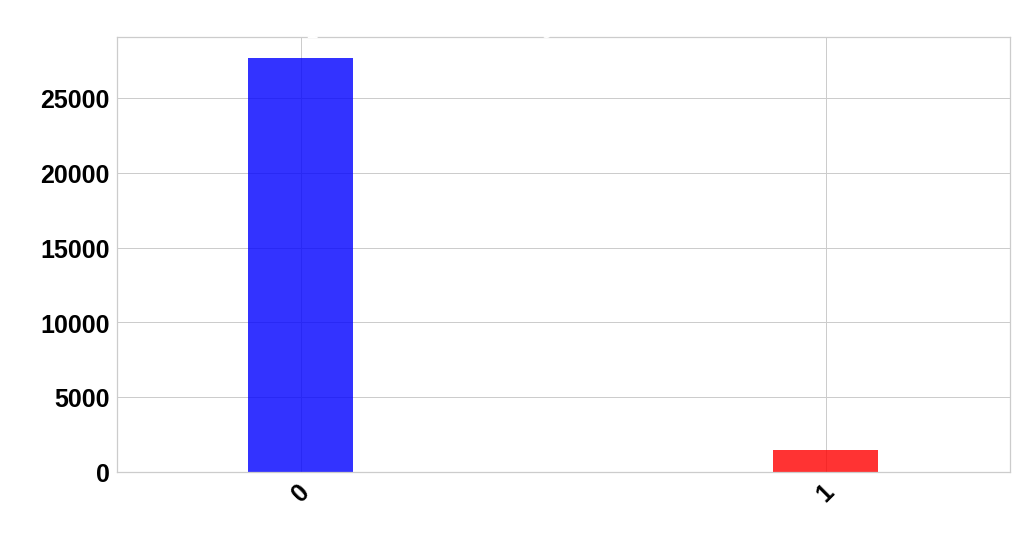

In [163]:
#Configurando os parâmetros da Figura.
plt.figure(figsize=(16, 8))


#Plotando Gráfico com Matplotlib.
df_kmeans['Cluster'].value_counts().plot(kind='bar', color=['blue', 'red'],  alpha=0.8, width=0.2)


#Plotando Gráfico com Searborn.

#Configurações para as fontes dos textos.
font = {'family': 'serif',
        'weight': 'bold',
        'size': 16,
        }
plt.title('Gráfico para distribuição de Classes - Clusters', fontdict=font, color='white', size=30)

#Configurando título, labels e ticks
plt.xlabel('Meses de Coleta', fontdict=font, color='white', size=30)
plt.ylabel('Tweets Coletados', fontdict=font, color='white', size=30)

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=25, color='black', weight="bold")
plt.yticks(size=25, color='black', weight="bold")

#Exibindo a figura.
plt.savefig('grafico.png', format='png', quality=100)
plt.show()

In [164]:
#Verificando os clusters únicos.
df_kmeans['Cluster'].unique()

array([1, 0], dtype=int32)

In [165]:
#Criando Vocabulário em formato de Dicionário para o sentimento das palavras.
words = pd.DataFrame(word_vectors.vocab.keys())
#Nomeando a coluna do DataFrame.
words.columns = ['words']
#Atribuindo as palavras a classe positiva ou negativa, de acordo com a clusterização.
words['vectors'] = words.words.apply(lambda x: word_vectors.wv[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



*Explicação para Função Lambda que atribui um sentimento em potencial para as palavras.*

**Para atribuir uma pontuação de sentimento para cada palavra foi realizada uma multiplicação pelo quão próximos eles estavam de seu cluster (para denotar o quão potencialmente positivos / negativos os termos são). Como a pontuação que o algoritmo K-means produz é a distância de ambos os clusters, para ponderá-los corretamente, foi feita a multiplicação pelo inverso da pontuação de proximidade (divisão da pontuação de sentimento pela pontuação de proximidade).**

In [166]:
#Para o cluster 0 atribuiu-se o sentimento como positivo e para o outro cluster atribuiu-se o sentimento negativo.
words['cluster_value'] = [1 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [167]:
words.head(5)

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
0,bom,"[0.043135274, 0.064903505, 0.03192659, 0.01985...",0,1,3.667273,3.667273
1,"dia,","[0.06292319, 0.06389027, 0.07390276, 0.0107130...",0,1,5.841721,5.841721
2,gente,"[0.012943892, 0.051915348, -0.017229196, 0.029...",0,1,1.564300,1.564300
3,to,"[0.005522688, 0.05939974, -0.02424874, 0.03687...",0,1,1.602705,1.602705
4,ativa,"[0.055700906, 0.057693228, 0.073944286, 0.0025...",0,1,9.575263,9.575263


In [168]:
negativas = words.loc[words.sentiment_coeff < 0, ['words', 'cluster', 'sentiment_coeff']]
negativas

,words,cluster,sentiment_coeff
17,pessoas,1,-5.439435
31,governo,1,-2.613056
39,via,1,-2.201894
41,prefeitura,1,-1.253777
45,sistema,1,-1.186963
...,...,...,...
28961,294,1,-7.057997
28984,98952,1,-6.165138
28985,2463,1,-6.486585
29056,221...,1,-7.256022


In [169]:
positivas = words.loc[words.sentiment_coeff > 0, ['words', 'cluster', 'sentiment_coeff']]
positivas

,words,cluster,sentiment_coeff
0,bom,0,3.667273
1,"dia,",0,5.841721
2,gente,0,1.564300
3,to,0,1.602705
4,ativa,0,9.575263
...,...,...,...
29152,"haha,",0,38.351292
29153,lyon,0,45.985550
29154,sobremesa,0,36.041802
29155,ja!!!,0,40.116009


In [170]:
words.shape

(29157, 6)

In [171]:
words.describe()['sentiment_coeff']

count    29157.000000
mean        25.144899
std         17.489998
min        -18.368275
25%         11.005462
50%         23.363640
75%         38.524680
max         77.429368
Name: sentiment_coeff, dtype: float64

In [172]:
#Importando Módulo da biblioteca Plotly,
import plotly.graph_objects as go

#Instanciando uma figura.
fig = go.Figure()

#Configurando e criando a exibição do gráfico.
fig.add_trace(go.Box(y=words['sentiment_coeff'], name='Score de Sentimento', marker_color = 'black'))

#Configurando o Layout a ser exibido.
fig.update_layout(width=700, height=700)

#Exibindo imagem.
fig.show()

In [173]:
words[['words', 'sentiment_coeff']].to_csv('dicionario_sentimentos.csv', index=False)

# Aplicando Métricas

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [174]:
from sklearn import metrics
from sklearn.metrics import silhouette_score 
from sklearn.metrics import davies_bouldin_score

In [175]:
silhouette_score(word_vectors.vectors, model.labels_)

0.6751714

In [176]:
metrics.calinski_harabasz_score(word_vectors.vectors, labels)

6477.551513727511

In [177]:
davies_bouldin_score(word_vectors.vectors, labels)

0.9933254717710683

# Gráficos

In [178]:
word_vectors = w2v_model.wv

In [179]:
pip install yellowbrick

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa61a4d438>,
                     model=None)

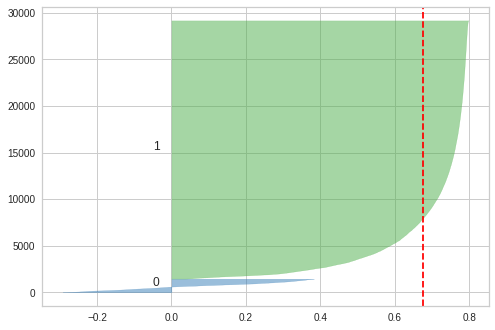

In [180]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(word_vectors.vectors)        

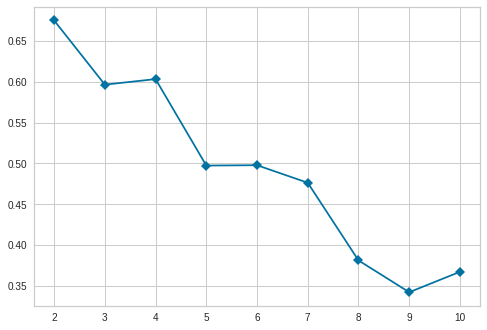

In [181]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)
visualizer.fit(word_vectors.vectors);  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in ver

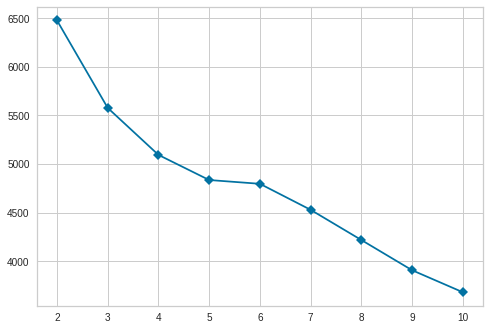

In [182]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='calinski_harabaz', timings=False)
visualizer.fit(word_vectors.vectors);        

In [183]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#from yellowbrick.text import TSNEVisualizer

#tfidf = TfidfVectorizer()

#X = tfidf.fit_transform(words)
#y = words['cluster']

#tsne = TSNEVisualizer()
#tsne.fit(X, y)
#tsne.show()

ValueError: ignored